# 1-Importing Libraries and packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2-Dataset Importing

In [35]:
data = pd.read_csv('../Supply chain Data Analysis/DataCoSupplyChainDataset.csv',header=0,encoding='unicode_escape')#header=0是什么意思
pd.set_option('display.max_columns',None)#None是什么意思
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


检查数据：
显示的是数字，但是是object里的str类型（共六个）
product price,product status,Order Customer  Id,Order Profit Per Order，Product Category Id


# 3-Exploratory data analysis [EDA]

In [36]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    #dtypes不是object类型的就是数字类型
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    #print(data[numerical_features].columns)
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    #print(data[cat_features].columns)
    print('5) Count of Categorical Features :',len(cat_features))
data_info(data)

features=data.drop(columns=['Late_delivery_risk'])
target=data['Late_delivery_risk']

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


# 4-Missing Value Identification

In [37]:
def features_with_missing_values(data):
    #pd.isnull()和pd.isna()是一样的。在numpy里是np.isnan()都是表示缺失值
    x = data.isnull().sum().sum()/data.size*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The features', i , 'has '+ str(data[i].isna().sum()) + ' missing values')
features_with_missing_values(data)
            
    

Percentage of Total Missing Values is  3.51 %
Missing Value Estimation :
The features Customer Lname has 8 missing values
The features Customer Zipcode has 3 missing values
The features Order Zipcode has 155679 missing values
The features Product Description has 180519 missing values


In [38]:
#delete features which have too many missing values
features = features.drop(columns=['Product Description','Order Zipcode'])


In [39]:
 #having directly related to the target:'Delivery Status','Days for shipping (real)','Days for shipment (scheduled)'
features = features.drop(columns=['Delivery Status','Days for shipping (real)','Days for shipment (scheduled)'])

In [40]:
features.isnull().sum()

Type                          0
Benefit per order             0
Sales per customer            0
Category Id                   0
Category Name                 0
Customer City                 0
Customer Country              0
Customer Email                0
Customer Fname                0
Customer Id                   0
Customer Lname                8
Customer Password             0
Customer Segment              0
Customer State                0
Customer Street               0
Customer Zipcode              3
Department Id                 0
Department Name               0
Latitude                      0
Longitude                     0
Market                        0
Order City                    0
Order Country                 0
Order Customer Id             0
order date (DateOrders)       0
Order Id                      0
Order Item Cardprod Id        0
Order Item Discount           0
Order Item Discount Rate      0
Order Item Id                 0
Order Item Product Price      0
Order It

In [41]:
#一些我们预测时不会知道的值
features = features.drop(columns=['Order Status'])
#一些跟预测没关系的值
features = features.drop(columns=['Customer Fname','Customer Lname','Customer Password','Product Image','Customer Email','Category Name'])

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Benefit per order           180519 non-null  float64
 2   Sales per customer          180519 non-null  float64
 3   Category Id                 180519 non-null  int64  
 4   Customer City               180519 non-null  object 
 5   Customer Country            180519 non-null  object 
 6   Customer Id                 180519 non-null  int64  
 7   Customer Segment            180519 non-null  object 
 8   Customer State              180519 non-null  object 
 9   Customer Street             180519 non-null  object 
 10  Customer Zipcode            180516 non-null  float64
 11  Department Id               180519 non-null  int64  
 12  Latitude                    180519 non-null  float64
 13  Longitude     

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
# 直接用为什么不行？
# le=LabelEncoder()
# features=le.fit_transform(features)

# cat_features = [c for c in features.columns if features[c].dtypes=='O']
# ##object 类型（cat_features里有很多是混合了int和str）,必须统一类型才能用Labelencoder
# features[cat_features]=features[cat_features].astype(str)

# numerical_features = [f for f in features.columns if features[f].dtypes!='O']
# features=pd.concat([features[cat_features],features[numerical_features]],axis=1)

features=features.apply(Labelencoder_feature)
features.shape
#features_with_missing_values(features)

(180519, 40)

# 5-Feature engineering

In [43]:
features.head()

,Type,Benefit per order,Sales per customer,Category Id,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,47,66,1,20649,0,36,3683,7,0,4,3624,4420,3,331,70,20649,5961,65749,114,426,4,180516,62,140,0,166,2568,18934,15,475,114,47,78,62,0,27149,3
1,3,2272,2559,47,66,1,19386,0,36,1400,7,0,4,5522,4419,3,391,69,19386,1147,64486,114,498,5,179253,62,44,0,166,2559,2272,13,841,114,47,78,62,0,2209,3
2,0,2293,2555,47,452,0,19385,0,5,6217,941,0,4,9146,232,3,391,69,19385,1146,64485,114,529,6,179252,62,44,0,166,2555,2293,13,841,114,47,78,62,0,1980,3
3,1,13638,2546,47,285,0,19384,2,5,1803,720,0,4,8467,663,3,3226,8,19384,1145,64484,114,600,7,179251,62,119,0,166,2546,13638,11,835,114,47,78,62,0,1752,3
4,2,20599,2526,47,66,1,19383,1,36,6345,7,0,4,3783,4421,3,3226,8,19383,1144,64483,114,682,8,179250,62,156,0,166,2526,20599,11,835,114,47,78,62,0,1528,3


In [44]:
#Feature Selection

# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,685.999651,0.000
39,Shipping Mode,34666.398337,0.000
31,Order Region,6.848744,0.009
4,Customer City,4.662629,0.031
38,shipping date (DateOrders),3.556568,0.059


In [45]:
final_results=f_reg_results.Variable.values
final_features=features[final_results]
final_data=pd.concat([final_features, target], axis=1)



<AxesSubplot:>

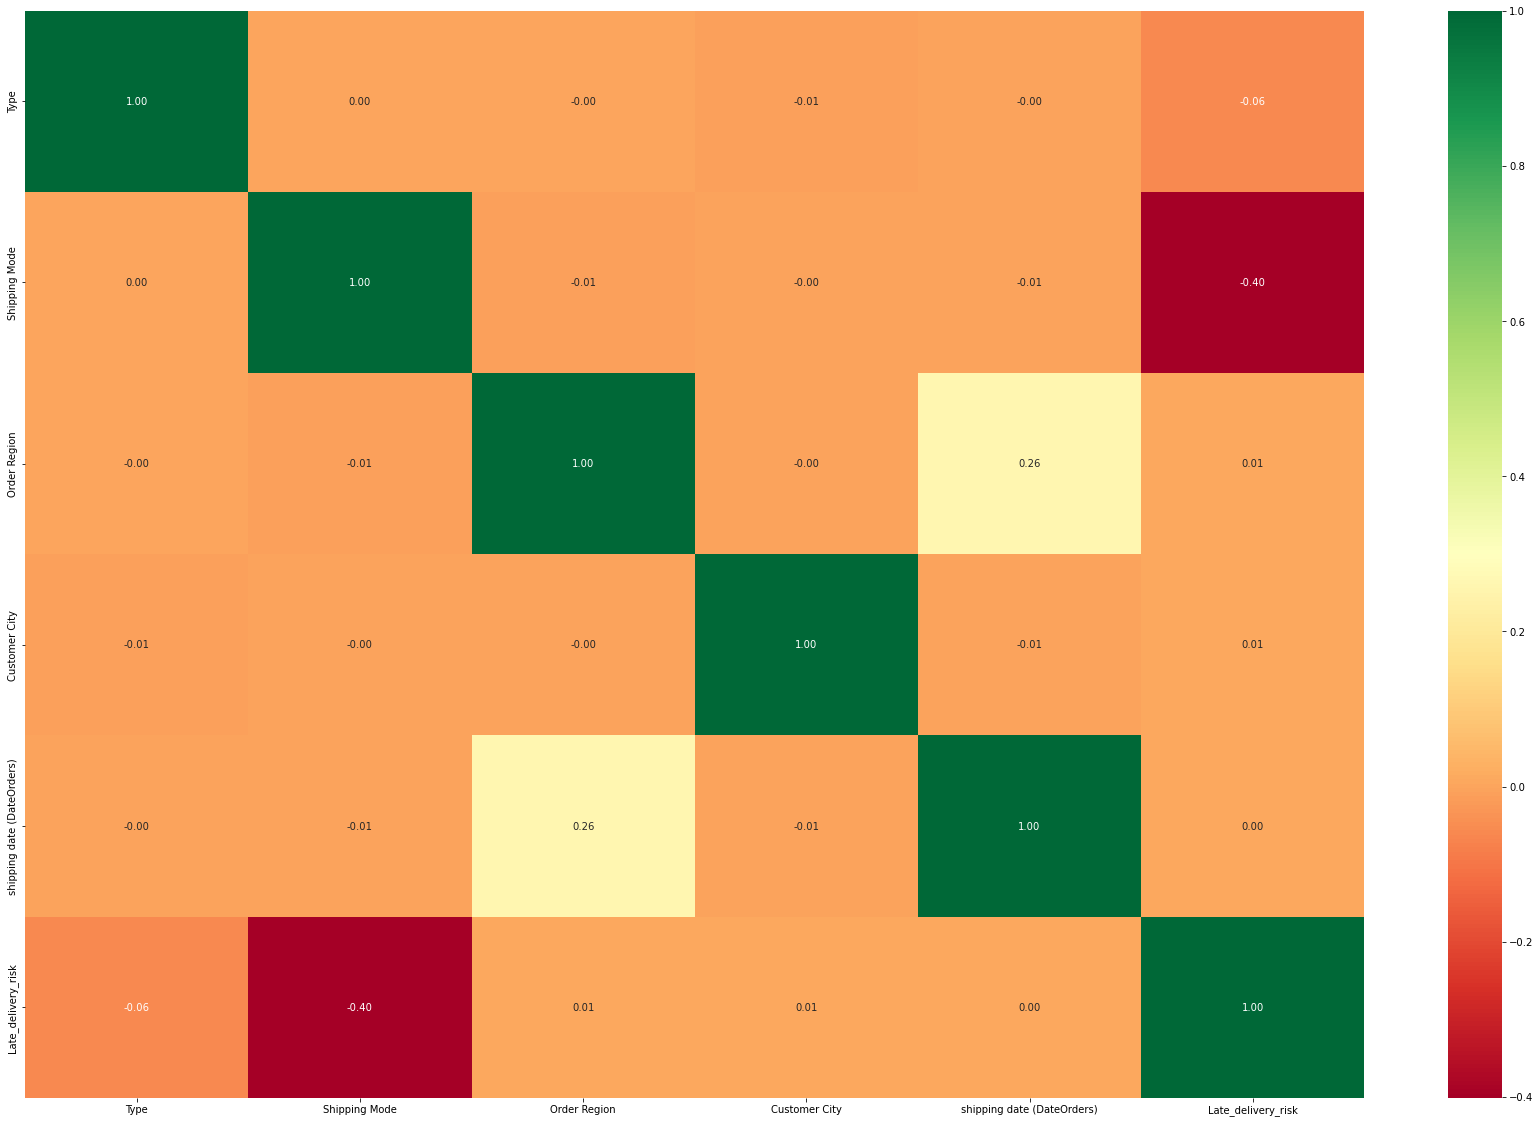

In [46]:
#data 里面包括了target
plt.figure(figsize=(30,20))#图里不是全部的列
#corr()只计算数字类型的列与列的关系,也就是只用numerical features（非object类型）
sns.heatmap(final_data.corr(),annot=True,fmt='.2f',cmap='RdYlGn')



# 6-Model Building

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state = 42)

In [48]:
lgr_pipline  = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression())])
rfc_pipline = Pipeline([("scaler", StandardScaler()), ("RandomForestClassifier", RandomForestClassifier())])
knn_pipline = Pipeline([("scaler", StandardScaler()), ("KNeighborsClassifier", KNeighborsClassifier())])
gnb_pipline = Pipeline([("scaler", StandardScaler()), ("GaussianNB", GaussianNB())])
sgd_pipline = Pipeline([("scaler", StandardScaler()), ("SGDClassifier", SGDClassifier())])
dt_pipline = Pipeline([("scaler", StandardScaler()), ("DecisionTreeClassifier", DecisionTreeClassifier())])

In [49]:
pip_dict ={0:'Logistic Regression' , 1:'RandomForestClassifier' , 2: 'KNeighborsClassifier' ,
            3: 'GaussianNB', 4: 'SGDClassifier', 5: 'DecisionTreeClassifier' }
pipelines=[lgr_pipline, rfc_pipline , knn_pipline, gnb_pipline  , sgd_pipline , dt_pipline ]

In [50]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    #用所有数据找最合适的模型，不仅仅是X_trian,y_train
    score = cross_val_score(pipe, final_features, target, cv = 10)
    print(pip_dict[i], ": ", score.mean())

Logistic Regression :  0.6906918386309326
RandomForestClassifier :  0.8930525582764535
KNeighborsClassifier :  0.7422761862169995
GaussianNB :  0.6718960851534189
SGDClassifier :  0.6906918386309326
DecisionTreeClassifier :  0.8857956709749782


In [51]:
grid_params = [
    {"classifier": [RandomForestClassifier()],
    "classifier__n_estimators": [50,100,150,200,250,300],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
    {"classifier": [KNeighborsClassifier()],
     "classifier__n_neighbors": [2,3,4,5,6],
     "classifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "classifier__leaf_size": [10,20,30,40,50],
    
    },
    
    {"classifier": [DecisionTreeClassifier()],
    "classifier__splitter" :["best", "random"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    },
    
]

In [52]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 8, verbose = 10, random_state = 42)
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


# 7-Model Evaluation

In [53]:
best_model.best_params_

{'classifier__splitter': 'random',
 'classifier__max_features': 'sqrt',
 'classifier__criterion': 'gini',
 'classifier': DecisionTreeClassifier(max_features='sqrt', splitter='random')}

In [57]:
pipeline_rfl = Pipeline([('scaler', StandardScaler()), 
                           ('RandomForestClassifier', RandomForestClassifier(criterion='gini',max_features= 'sqrt'))])
model_rfl = pipeline_rfl.fit(X_train, y_train)
rfl_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : model_rfl.predict(X_train)})
rfl_test_predict = pd.DataFrame({'actual' : y_test,
                                 'predicted' : model_rfl.predict(X_test)})
rfl_test_predict.head()

,actual,predicted
80120,1,1
19670,1,1
114887,0,0
120110,1,1
56658,0,0


# 8-Predictive Analytics:Late_delivery_prediction

In [58]:
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rfl_test_predict.actual, rfl_test_predict.predicted))
print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rfl_train_predict.actual, rfl_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rfl_test_predict.actual, rfl_test_predict.predicted))


Accuracy Score for test dataset :  0.9475127409705296
Accuracy Score for train dataset :  0.9999584530692796
ROC-AUC Score for train dataset :  0.9999580620305011
ROC-AUC Score for validation dataset :  0.9471879334241757


<AxesSubplot:>

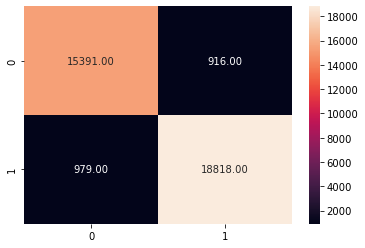

In [59]:
#confusion matrix
conn_cm_test = metrics.confusion_matrix(rfl_test_predict.actual, rfl_test_predict.predicted)
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True)

In [60]:
print(metrics.classification_report(rfl_test_predict.actual, rfl_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16307
           1       0.95      0.95      0.95     19797

    accuracy                           0.95     36104
   macro avg       0.95      0.95      0.95     36104
weighted avg       0.95      0.95      0.95     36104



# 9-Classification Model Evaluation

# 10-Saving the trained regression model to pickle file

In [62]:
filename = 'Late_delivery_risk_prediction.pkl'
pickle.dump(best_model,open(filename,'wb'))

In [ ]:
pickle.load('Late_delivery_risk_prediction.pkl')